In [2]:
!sudo apt install tesseract-ocr
!pip install pytesseract

!pip install transformers
!pip install summa

!pip install bert-extractive-summarizer

# !pip install spacy download en_core_web_sm
# !pip install spacy
# !python -m spacy download en_core_web_lg
# !pip install textacy

!pip install nltk
!pip install networkx
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

!pip install git+https://github.com/boudinfl/pke.git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 9 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (12.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debcon

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


  Cloning https://github.com/boudinfl/pke.git to /tmp/pip-req-build-m97ckhwk
  Running command git clone --filter=blob:none --quiet https://github.com/boudinfl/pke.git /tmp/pip-req-build-m97ckhwk
  Resolved https://github.com/boudinfl/pke.git to commit 69871ffdb720b83df23684fea53ec8776fd87e63
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 3.6 MB/s eta 0:00:00
  Created wheel for pke: filename=pke-2.0.0-py3-none-any.whl size=6160628 sha256=cfddee8f2deb7801a2db79e2be4b68ea7040217b93daaa920d9f9f6a2de91b0f
  Stored in directory: /tmp/pip-ephem-wheel-cache-x_74gyd3/wheels/8c/07/29/6b35bed2aa36e33d77ff3677eb716965ece4d2e56639ad0aab
Successfully built pke


In [3]:
def summaryOutput(body,MaxL,MinL):
  os.environ["CUDA_VISIBLE_DEVICES"] = "0"
  summarizer = pipeline("summarization", model="t5-base",
                        tokenizer="t5-base", framework="tf")
  summary_text = summarizer(body, max_length=MaxL, min_length=MinL, do_sample=False)[0]['summary_text']

  return summary_text

In [4]:
def flowchartMaking(body):
    # Generate summary using GPT-2
    summarizer = pipeline("summarization", model="gpt2")
    summary = summarizer(body, max_length=100, min_length=20, do_sample=False)[0]['summary_text']

    # Split summary into sentences
    sentences = re.split(r'[.!?]', summary)
    sentences = [sentence.strip() for sentence in sentences if sentence.strip()]

    # Create the graph
    graph = pydot.Dot(graph_type='digraph')

    # Define symbols and colors
    decision_shape = 'diamond'
    action_shape = 'rectangle'
    decision_color = 'lightblue'
    action_color = 'lightgreen'

    # Create nodes for each sentence
    nodes = {}
    for i, sentence in enumerate(sentences):
        if "if" in sentence.lower():
            nodes[i] = pydot.Node(sentence, shape=decision_shape, style='filled', fillcolor=decision_color)
        else:
            nodes[i] = pydot.Node(sentence, shape=action_shape, style='filled', fillcolor=action_color)
        graph.add_node(nodes[i])

    # Connect the nodes based on their relationships
    for i in range(len(sentences) - 1):
        graph.add_edge(pydot.Edge(nodes[i], nodes[i + 1]))

    # Save and display the graph
    graph.write_png('flowchart1.png')
    img = mpimg.imread('flowchart1.png')
    plt.imshow(img)

# def flowchartMaking(body):
#     # Extract keywords from the input paragraph
#     keyphrases = keywords.keywords(body).split('\n')

#     # Create the graph
#     graph = pydot.Dot(graph_type='digraph')

#     # Define symbols and colors
#     decision_shape = 'diamond'
#     action_shape = 'rectangle'
#     decision_color = 'lightblue'
#     action_color = 'lightgreen'

#     # Create nodes for each key phrase
#     nodes = {}
#     for i, phrase in enumerate(keyphrases):
#         if "if" in phrase.lower():
#             nodes[i] = pydot.Node(phrase, shape=decision_shape, style='filled', fillcolor=decision_color)
#         else:
#             nodes[i] = pydot.Node(phrase, shape=action_shape, style='filled', fillcolor=action_color)
#         graph.add_node(nodes[i])

#     # Connect the nodes based on their relationships
#     for i in range(len(keyphrases) - 1):
#         graph.add_edge(pydot.Edge(nodes[i], nodes[i + 1]))

#     # Save and display the graph
#     graph.write_png('flowchart1.png')
#     img = mpimg.imread('flowchart1.png')
#     plt.imshow(img)

In [5]:
# ONLY NODES
# def create_mindmap(paragraph):
#     # Tokenize the paragraph into sentences and then into words
#     sentences = sent_tokenize(paragraph)
#     words = [word_tokenize(sent) for sent in sentences]

#     # Remove stop words and punctuation
#     stop_words = set(stopwords.words('english') + list(punctuation))
#     filtered_words = []
#     for sent in words:
#         filtered_words.append([w.lower() for w in sent if w.lower() not in stop_words])

#     # Calculate word frequency and filter out infrequent words
#     flat_words = [item for sublist in filtered_words for item in sublist]
#     freq_dist = nltk.FreqDist(flat_words)
#     important_words = [word for word, freq in freq_dist.items() if freq > 2]

#     # Build the graph
#     G = nx.Graph()
#     for i, sent in enumerate(filtered_words):
#         for j, word in enumerate(sent):
#             if word in important_words:
#                 G.add_node(word)
#                 if j > 0:
#                     G.add_edge(sent[j-1], word)
#                 if j < len(sent) - 1:
#                     G.add_edge(word, sent[j+1])
#                 if i > 0:
#                     prev_sent = filtered_words[i-1]
#                     if j < len(prev_sent):
#                         G.add_edge(word, prev_sent[j])
#                 if i < len(filtered_words) - 1:
#                     next_sent = filtered_words[i+1]
#                     if j < len(next_sent):
#                         G.add_edge(word, next_sent[j])

#     # Draw the graph
#     pos = nx.spring_layout(G)
#     plt.figure(figsize=(10, 10))
#     nx.draw(G, pos, with_labels=True, font_size=12, font_weight='bold')
#     plt.show()


# NODES AND EDGES
def create_mindmap(paragraph):
    # Tokenize the paragraph into sentences and then into words
    sentences = sent_tokenize(paragraph)
    words = [word_tokenize(sent) for sent in sentences]

    # Remove stop words and punctuation
    stop_words = set(stopwords.words('english') + list(punctuation))
    filtered_words = []
    for sent in words:
        filtered_words.append([w.lower() for w in sent if w.lower() not in stop_words])

    # Calculate word frequency and filter out infrequent words
    flat_words = [item for sublist in filtered_words for item in sublist]
    freq_dist = nltk.FreqDist(flat_words)
    important_words = [word for word, freq in freq_dist.items() if freq > 2]

    # Build the graph
    G = nx.Graph()
    for i, sent in enumerate(filtered_words):
        for j, word in enumerate(sent):
            if word in important_words:
                G.add_node(word)
                if j > 0:
                    G.add_edge(sent[j-1], word, label='follows')
                if j < len(sent) - 1:
                    G.add_edge(word, sent[j+1], label='follows')
                if i > 0:
                    prev_sent = filtered_words[i-1]
                    if j < len(prev_sent):
                        G.add_edge(word, prev_sent[j], label='related to')
                if i < len(filtered_words) - 1:
                    next_sent = filtered_words[i+1]
                    if j < len(next_sent):
                        G.add_edge(word, next_sent[j], label='related to')

    # Draw the graph
    pos = nx.spring_layout(G)
    plt.figure(figsize=(15, 15))
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_color='blue', font_weight='bold')
    nx.draw(G, pos, with_labels=True, font_size=12, font_weight='bold')
    plt.show()



# NODES EDGES BUT MESSED UP
# def create_mindmap(paragraph):
#     # Tokenize the paragraph into sentences and then into words
#     sentences = sent_tokenize(paragraph)
#     words = [word_tokenize(sent) for sent in sentences]

#     # Remove stop words and punctuation
#     stop_words = set(stopwords.words('english') + list(punctuation))
#     filtered_words = []
#     for sent in words:
#         filtered_words.append([w.lower() for w in sent if w.lower() not in stop_words])

#     # Identify nouns and adjectives
#     tagged_words = []
#     for sent in filtered_words:
#         tagged_words.append(pos_tag(sent))
#     nouns = set([word for sent in tagged_words for word, pos in sent if pos.startswith('N')])
#     adjectives = set([word for sent in tagged_words for word, pos in sent if pos.startswith('J')])

#     # Build the graph
#     G = nx.Graph()
#     for i, sent in enumerate(filtered_words):
#         for j, word in enumerate(sent):
#             if word in nouns or word in adjectives:
#                 G.add_node(word)
#                 if j > 0:
#                     prev_word = sent[j-1]
#                     if prev_word in nouns or prev_word in adjectives:
#                         G.add_edge(prev_word, word, label='follows')
#                     elif prev_word in set(['in', 'of', 'on']):
#                         G.add_edge(prev_word, word, label=prev_word)
#                 if j < len(sent) - 1:
#                     next_word = sent[j+1]
#                     if next_word in nouns or next_word in adjectives:
#                         G.add_edge(word, next_word, label='follows')
#                     elif next_word in set(['in', 'of', 'on']):
#                         G.add_edge(word, next_word, label=next_word)
#                 if i > 0:
#                     prev_sent = filtered_words[i-1]
#                     if j < len(prev_sent):
#                         prev_word = prev_sent[j]
#                         if prev_word in nouns or prev_word in adjectives:
#                             G.add_edge(prev_word, word, label='related to')
#                 if i < len(filtered_words) - 1:
#                     next_sent = filtered_words[i+1]
#                     if j < len(next_sent):
#                         next_word = next_sent[j]
#                         if next_word in nouns or next_word in adjectives:
#                             G.add_edge(word, next_word, label='related to')

#     # Draw the graph
#     pos = nx.circular_layout(G)
#     plt.figure(figsize=(10, 10))
#     nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='#1f77b4')
#     nx.draw_networkx_edges(G, pos, edge_color='#b4b4b4')
#     labels = nx.get_edge_attributes(G,'label')
#     nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=12, font_weight='bold')
#     nx.draw_network



In [6]:
  def exKeywords(body, limit):
    extractor = pke.unsupervised.TopicRank()

    # load the content of the document, here document is expected to be a simple
    # test string and preprocessing is carried out using spacy
    extractor.load_document(input=body, language='en')

    # keyphrase candidate selection, in the case of TopicRank: sequences of nouns
    # and adjectives (i.e. `(Noun|Adj)*`)
    extractor.candidate_selection()

    # candidate weighting, in the case of TopicRank: using a random walk algorithm
    extractor.candidate_weighting()

    # N-best selection, keyphrases contains the 10 highest scored candidates as
    # (keyphrase, score) tuples
    keyphrases = extractor.get_n_best(n=limit)
    return keyphrases

In [7]:
def imageUpload():
  # To upload an image and get the text in digital format.
  # Upload the image file
  print("Upload an image: ")
  uploaded = files.upload()

  # Get the file name and data
  file_name, file_data = next(iter(uploaded.items()))
  # Convert the file data to a numpy array
  img_data = np.frombuffer(file_data, np.uint8)
  # Read the image using OpenCV
  img = cv2.imdecode(img_data, cv2.IMREAD_COLOR)
  # Convert the image to RGB
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  # Apply OCR on the image
  body = pytesseract.image_to_string(img)

  # Print the extracted text
  return body

In [8]:
def textUpload():

  print("Enter text: \n")
  body = input()

  # Print the entered text
  return body

Enter
1 to upload an Image
2 to enter text
2
Enter text: 

hello my name is greha what is your name?

Your text is: 
hello my name is greha what is your name?
Enter
1 for summary
2 for Flowchart
3 for Mind-Maps
4 for Keywords
3
Output: 



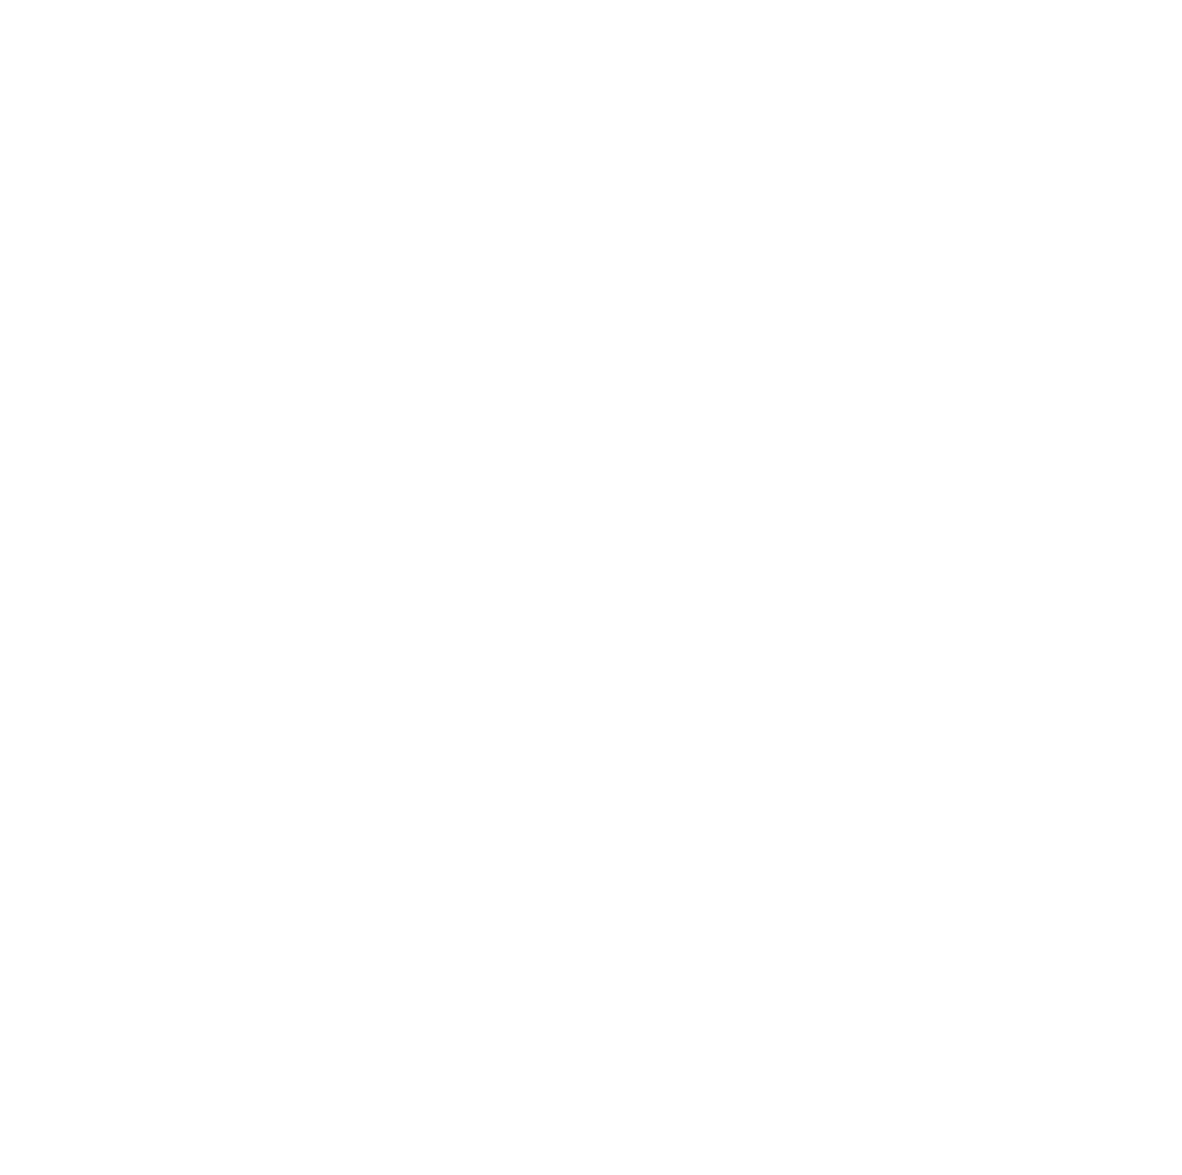

In [9]:
from google.colab import files
import cv2
import pytesseract
import numpy as np
from transformers import pipeline
import os

from summarizer import TransformerSummarizer
import pydot
import re
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from summa import keywords

import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from string import punctuation
import networkx as nx
import matplotlib.pyplot as plt

import pke

n = int(input("Enter\n1 to upload an Image\n2 to enter text\n"))
if n == 1:
  body = imageUpload()
  print("\nYour Extracted text from the image is: ")
  print(body)
elif n == 2:
  body = textUpload()
  print("\nYour text is: ")
  print(body)

kv = int(input("Enter\n1 for summary\n2 for Flowchart\n3 for Mind-Maps\n4 for Keywords\n"))
if kv == 1:
  MaxL = int(input("Enter the Maximum limit of summary: "))
  MinL = int(input("Enter the Minimum limit of summary: "))
  final = summaryOutput(body,MaxL,MinL)
  print("Output: \n")
  start = 0
  N = 10
  l = final.split()
  for stop in range(N, len(l)+N, N):
      print(' '.join(l[start:stop]))
      start = stop


if kv == 2:
  print("Output: \n")
  final = flowchartMaking(body)
if kv == 3:
  print("Output: \n")
  graph = create_mindmap(body)
if kv == 4:
  limit = int(input("Enter Keyword Limit: "))
  final = exKeywords(body, limit)
  print("Output: \n")
  # print(final)
  start = 0
  N = 10
  l = final.split()
  for stop in range(N, len(l)+N, N):
      print(' '.join(l[start:stop]))
      start = stop




# New section